In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score,classification_report,ConfusionMatrixDisplay

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Add necessary imports
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_2020_WOstream.csv')

In [ ]:
df = df.drop_duplicates()

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df

In [ ]:
df = remove_outlier(df,'BMI')
df = remove_outlier(df,'SleepTime')

In [ ]:
df.shape

(288362, 18)

In [ ]:
# Replace diabetic values to be Yes/No only.
df['Diabetic'] = df['Diabetic'].replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'})

# Store categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Save binary categorical columns
columns_to_replace = [column for column in categorical_columns if 'Yes' in list(df[column].unique())]

In [ ]:
# Replace binary categorical columns
for column in columns_to_replace:
    df[column] = df[column].replace({'Yes':1, 'No':0})

In [ ]:
# Store multi categorical columns
columns_to_display = [column for column in categorical_columns if 0 in list(df[column].unique())]

In [ ]:
# Convert the loan default on file to numeric rather than categorical data.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert age category to ordinal
df['AgeCategory'] = label_encoder.fit_transform(df['AgeCategory'])

In [ ]:
print("Original Value => Transformed Value\n")
for i in range(len(label_encoder.classes_)):
    print(label_encoder.classes_[i],"=>",i)

Original Value => Transformed Value

18-24 => 0
25-29 => 1
30-34 => 2
35-39 => 3
40-44 => 4
45-49 => 5
50-54 => 6
55-59 => 7
60-64 => 8
65-69 => 9
70-74 => 10
75-79 => 11
80 or older => 12


In [ ]:
# Replace GenHealth based on their order of health status.
df['GenHealth'] = df['GenHealth'].replace(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], [0,1,2,3,4])

In [ ]:
df = df.drop(columns=['Sex', 'Race'])

In [ ]:
a_df = df.copy() #andrew
c_df = df.copy() #charmaine
j_df = df.copy() #joseph
n_df = df.copy() #nicole

# Andrew

In [ ]:
a_df = a_df.drop(columns=['Stroke', 'Diabetic', 'SkinCancer'])

Total records: 51026


,occurrences,occurrences (%)
0,25513,50.0%
1,25513,50.0%


Looking at the distribution of classes in the target column (HeartDisease):


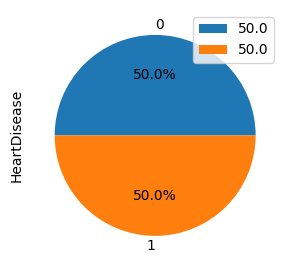

In [ ]:
target_column = 'HeartDisease'
dataframe = a_df

number_for_sixty = len(dataframe[dataframe[target_column]==1])

df2 = pd.concat([dataframe[dataframe[target_column]==0].sample(n=int(number_for_sixty), random_state=42), dataframe[dataframe[target_column]==1]], axis=0)
df_under = df2.reset_index(drop=True)

dataframe = df_under

# Checking the distribution of the delays
delays = pd.DataFrame({'occurrences': dataframe[target_column].value_counts(),
                      'occurrences (%)': [str(round((x/len(dataframe)*100), 2))+"%" for x in dataframe[target_column].value_counts()]})
print("Total records:", sum(delays['occurrences']))
display(delays)

print("Looking at the distribution of classes in the target column (HeartDisease):")

labels = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
sizes = round((dataframe[target_column].value_counts()/len(dataframe)*100),2)
(dataframe[target_column].value_counts()/len(dataframe)*100).plot(kind='pie', figsize=(3, 3), autopct = '%1.1f%%')
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [ ]:
x_udf = df_under.drop(columns=target_column)
y_udf = df_under[target_column]

# Let split the data into train and testing
a_x_train_under, a_x_test_under, a_y_train_under, a_y_test_under = train_test_split(x_udf, y_udf, test_size=0.2, random_state=42)

In [ ]:
a_lr = GradientBoostingClassifier(random_state=42, learning_rate=0.08)
a_lr.fit(a_x_train_under, a_y_train_under)

GradientBoostingClassifier(learning_rate=0.08, random_state=42)

              precision    recall  f1-score   support

           0       0.77      0.69      0.72      5033
           1       0.72      0.80      0.76      5173

    accuracy                           0.74     10206
   macro avg       0.74      0.74      0.74     10206
weighted avg       0.74      0.74      0.74     10206



Text(0.5, 6.8833333333333275, 'Predicted')

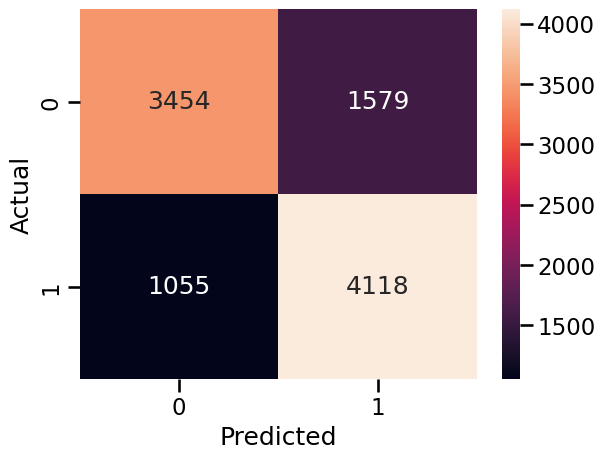

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

a_y_predict = a_lr.predict(a_x_test_under)
print(classification_report(a_y_test_under, a_y_predict))

cm = confusion_matrix(a_y_test_under, a_y_predict)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

# Charmaine

In [ ]:
c_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
c_X = df.drop(columns=['SkinCancer', 'HeartDisease', 'Stroke', 'Diabetic'])
c_y = df['SkinCancer']

In [ ]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
c_X_res, c_y_res = ros.fit_resample(c_X, c_y)

0    259972
1    259972
Name: SkinCancer, dtype: int64

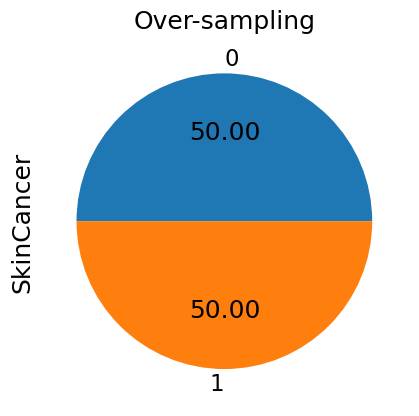

In [ ]:
ax = c_y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

c_y_res.value_counts()

In [ ]:
c_X_train_res, c_X_test_res, c_y_train_res, c_y_test_res = train_test_split(c_X_res, c_y_res, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, learning_rate=0.1)
gb_model.fit(c_X_train_res, c_y_train_res)

# Make predictions on the test set
c_y_pred_res = gb_model.predict(c_X_test_res)

# Evaluate the model
gb_accuracy = accuracy_score(c_y_test_res, c_y_pred_res)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Classification Report:\n", classification_report(c_y_test_res, c_y_pred_res))

Gradient Boosting Accuracy: 0.7124792045312485
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68     52171
           1       0.68      0.81      0.74     51818

    accuracy                           0.71    103989
   macro avg       0.72      0.71      0.71    103989
weighted avg       0.72      0.71      0.71    103989



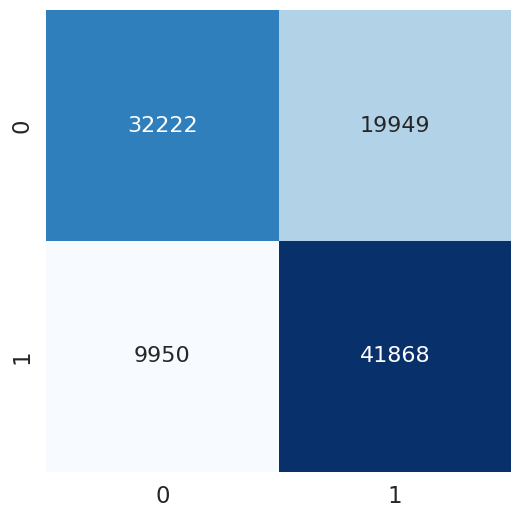

In [ ]:
def conf_matrix(c_y_test_res, c_pred_test_res):

    # Creating a confusion matrix
    con_mat = confusion_matrix(c_y_test_res, c_pred_test_res)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
conf_matrix(c_y_test_res, c_y_pred_res)

# Joseph

In [ ]:
j_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
cols = j_df.columns.tolist()
print(cols)

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [ ]:
cols = ['Stroke','HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
j_df = j_df[cols]

In [ ]:
j_df_new = j_df.drop(columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'MentalHealth', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'])

In [ ]:
j_df_new.columns

Index(['Stroke', 'BMI', 'PhysicalHealth', 'AgeCategory', 'GenHealth',
       'SleepTime'],
      dtype='object')

In [ ]:
j_x = j_df_new.iloc[:,1:].values
j_y = j_df_new.iloc[:,0].values
j_x_train,j_x_test,j_y_train,j_y_test = train_test_split(j_x,j_y,test_size=0.2,random_state=0)

In [ ]:
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('u', under)]
pipeline = Pipeline(steps=steps)
j_x_train_fs, j_y_train_fs = pipeline.fit_resample(j_x_train, j_y_train)
print(f"Training target statistics(original): {Counter(j_y_train)}")
print(f"Training target statistics: {Counter(j_y_train_fs)}")

Training target statistics(original): Counter({0: 221789, 1: 8900})
Training target statistics: Counter({0: 12714, 1: 8900})


In [ ]:
j_svm = SVC(kernel='rbf', gamma="auto")

In [ ]:
j_svm.fit(j_x_train_fs, j_y_train_fs)

SVC(gamma='auto')

In [ ]:
j_y_pred = j_svm.predict(j_x_test)

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     55377
           1       0.10      0.64      0.17      2296

    accuracy                           0.76     57673
   macro avg       0.54      0.70      0.52     57673
weighted avg       0.95      0.76      0.83     57673



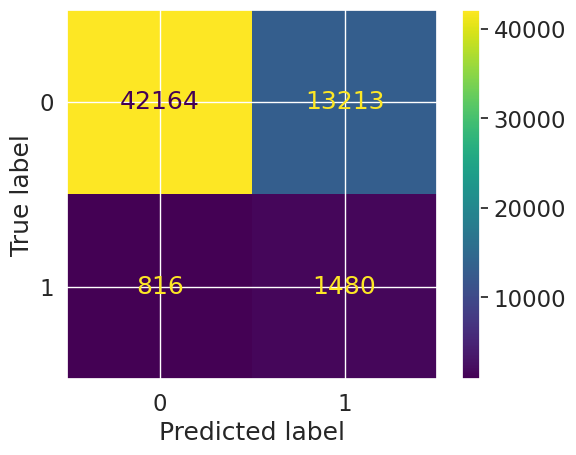

None


In [ ]:
print(classification_report(j_y_test,j_y_pred))
conf_matrix = confusion_matrix(y_true=j_y_test, y_pred=j_y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=j_svm.classes_)
vis.plot()
print(plt.show())

# Nicole

Removing the other target columns (used by other members)

In [ ]:
excluded_columns = ['HeartDisease', 'Stroke', 'SkinCancer']

n_df_new = df.drop(columns=excluded_columns).copy()
n_df_new

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,31.19,0,0,0.0,0.0,0,4,0,1,4,8.0,0,0
1,23.24,0,0,0.0,0.0,0,9,0,1,3,7.0,0,1
2,32.92,0,0,10.0,3.0,0,5,0,1,1,8.0,0,0
3,31.75,1,0,0.0,3.0,0,5,0,1,1,5.0,0,0
4,19.74,0,0,0.0,1.0,0,7,0,1,4,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319638,23.38,0,0,0.0,0.0,0,8,0,1,4,6.0,0,0
319639,22.22,0,0,0.0,0.0,0,0,0,1,4,8.0,0,0
319640,27.41,1,0,7.0,0.0,1,8,1,0,1,6.0,1,0
319641,29.84,1,0,0.0,0.0,0,3,0,1,3,5.0,1,0


Specifying the features included within the x and y variable.

In [ ]:
n_x = n_df_new.drop(["Diabetic"], axis = 1)
n_y = n_df_new["Diabetic"]

Splitting the training and testing data

In [ ]:
# splitting the training and testing set
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_x, n_y, test_size = 0.2, stratify = n_df_new.Diabetic, random_state=123)

Conducting the Balancing of data using random undersampling method

In [ ]:
# Create the RandomUnderSampler with the desired percentages
n_rus = RandomUnderSampler(sampling_strategy=1)

# Resample the data
n_x_rus, n_y_rus = n_rus.fit_resample(n_x_train, n_y_train)

Modelling and Prediction

              precision    recall  f1-score   support

           0       0.95      0.68      0.79     49821
           1       0.27      0.75      0.40      7852

    accuracy                           0.69     57673
   macro avg       0.61      0.72      0.59     57673
weighted avg       0.85      0.69      0.74     57673

Accuracy Score: 0.6871846444610129
Sensitivity: 0.26863163631409237
Specificity: 0.9456722948336792


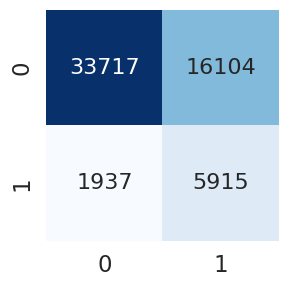

In [ ]:
#building gradientboosting classifier
n_best_model = GradientBoostingClassifier()
n_best_model.fit(n_x_rus, n_y_rus)

# classification report
print(classification_report(n_y_test, n_best_model.predict(n_x_test)))

# accuracy score
n_best_pred = n_best_model.predict(n_x_test)
print("Accuracy Score: " + str(accuracy_score(n_y_test, n_best_pred)))

# Function to create a confusion matrix
def n_conf_matrix(y_test, pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    # Calculate true positive, true negative, false positive, false negative
    TP = con_mat[1][1]
    TN = con_mat[0][0]
    FP = con_mat[0][1]
    FN = con_mat[1][0]

    # Calculate sensitivity (True Positive Rate or Recall)
    sensitivity = TP / (TP + FN)

    # Calculate specificity (True Negative Rate)
    specificity = TN / (TN + FP)

    # Print sensitivity and specificity
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    #Ploting the confusion matrix
    plt.figure(figsize=(3,3))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
n_conf_matrix(n_y_test, n_best_pred)